#Problema #1:
#Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

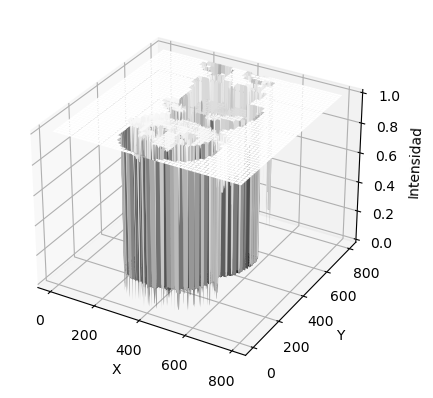

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_grayscale_image_3d(image):
    # Obtener las dimensiones de la imagen
    height, width = image.shape
    
    # Crear las coordenadas X e Y para el gráfico 3D
    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    x, y = np.meshgrid(x, y)
    
    # Obtener los valores de intensidad de la imagen
    z = image
    
    # Crear una figura y un eje para el gráfico 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Crear la superficie 3D utilizando las coordenadas y la intensidad
    ax.plot_surface(x, y, z, cmap='gray')
    
    # Configurar etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    
    # Mostrar el gráfico 3D
    plt.show()

# Cargar una imagen en escala de grises 
image_path ="niño.jpg"
grayscale_image = plt.imread(image_path)[:, :, 0]  # Lee solo un canal en escala de grises

# Visualizar la imagen en 3D
visualize_grayscale_image_3d(grayscale_image)


#Problema #2:
#Implemente una funci´on para cada una de las transformaciones vistas en clase: negativa, lineal,
logar´ıtmica y exponencial.

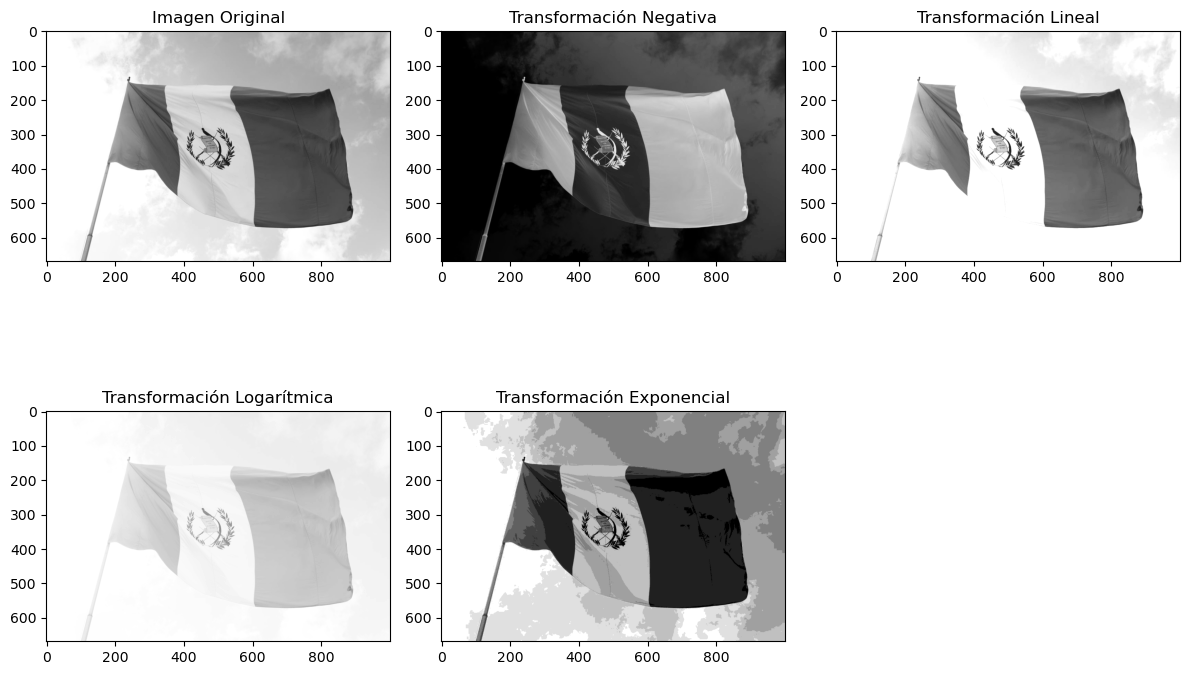

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def negative_transformation(image):
    negative_image = 255 - image
    return negative_image

def linear_transformation(image, alpha, beta):
    linear_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)
    return linear_image

def logarithmic_transformation(image, c=1):
    logarithmic_image = c * np.log1p(image)
    return logarithmic_image.astype(np.uint8)

def exponential_transformation(image, c=1, gamma=1):
    exponential_image = c * np.power(image, gamma)
    return exponential_image.astype(np.uint8)

# Cargar una imagen en escala de grises utilizando OpenCV
image_path = "Ban.jpg"
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar las transformaciones a la imagen
negative_image = negative_transformation(grayscale_image)
linear_image = linear_transformation(grayscale_image, alpha=1.2, beta=30)
logarithmic_image = logarithmic_transformation(grayscale_image, c=30)
exponential_image = exponential_transformation(grayscale_image, c=0.002, gamma=1.5)

# Mostrar las imágenes transformadas
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Transformación Negativa')

plt.subplot(2, 3, 3)
plt.imshow(linear_image, cmap='gray')
plt.title('Transformación Lineal')

plt.subplot(2, 3, 4)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Transformación Logarítmica')

plt.subplot(2, 3, 5)
plt.imshow(exponential_image, cmap='gray')
plt.title('Transformación Exponencial')

plt.tight_layout()
plt.show()


##Problema #3:
##Desarrolle una funci´on que dada dos im´agenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario pasar
la imagen a escala de grises y luego binarizarla.

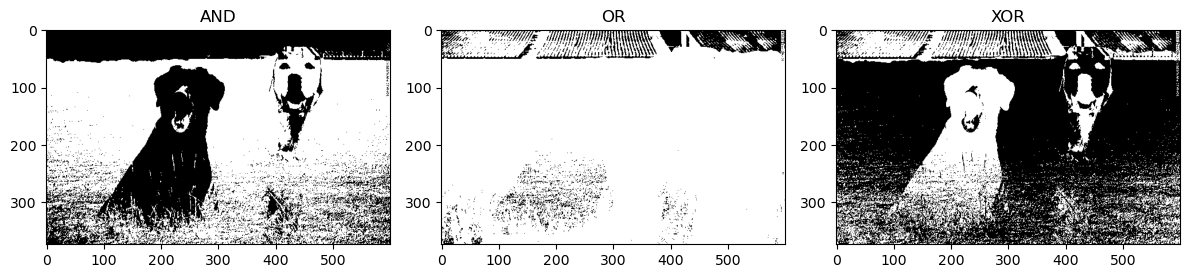

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def perform_image_operations(image1, image2):
    # Redimensionar imágenes para que tengan las mismas dimensiones
    height, width = min(image1.shape[0], image2.shape[0]), min(image1.shape[1], image2.shape[1])
    image1 = cv2.resize(image1, (width, height))
    image2 = cv2.resize(image2, (width, height))
    
    # Conversión de las imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Binarización de las imágenes en escala de grises
    _, binarized_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binarized_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)
    
    # Operaciones lógicas
    and_image = cv2.bitwise_and(binarized_image1, binarized_image2)
    or_image = cv2.bitwise_or(binarized_image1, binarized_image2)
    xor_image = cv2.bitwise_xor(binarized_image1, binarized_image2)
    
    return and_image, or_image, xor_image

# Cargar dos imágenes a color de diferentes dimensiones
image_path1 = "imagen1.jpg"
image_path2 = "imagen2.jpg"
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Realizar operaciones en las imágenes
and_image, or_image, xor_image = perform_image_operations(image1, image2)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(and_image, cmap='gray')
plt.title('AND')

plt.subplot(1, 3, 2)
plt.imshow(or_image, cmap='gray')
plt.title('OR')

plt.subplot(1, 3, 3)
plt.imshow(xor_image, cmap='gray')
plt.title('XOR')

plt.tight_layout()
plt.show()


#Problema 4
#Realice una comparaci´on entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano
para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV
y cualquier imagen, como entregable debe mostrar una comparaciA˜n entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque.

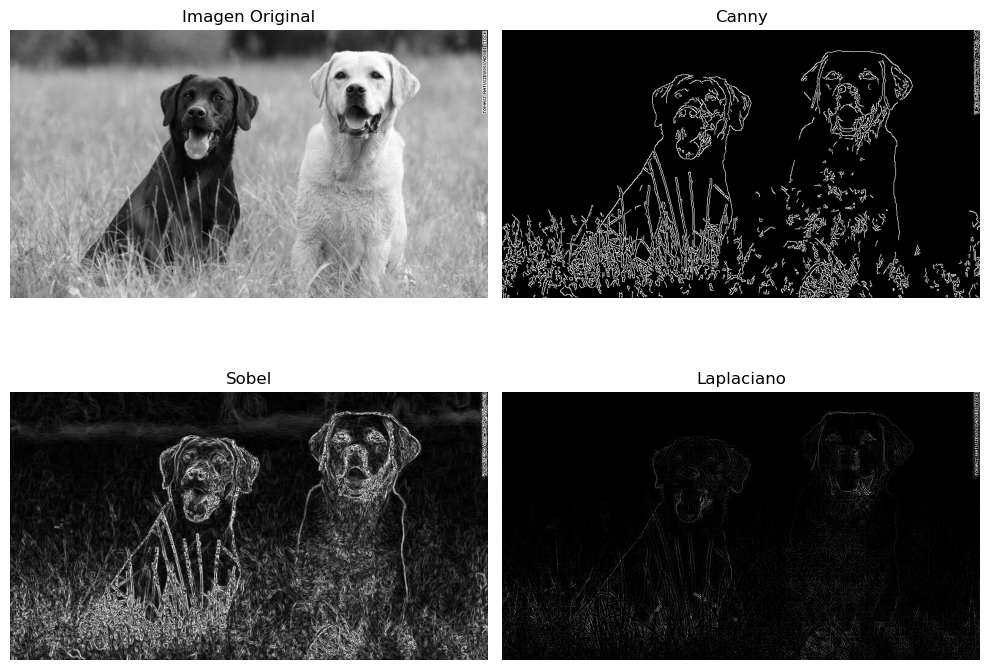

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen de ejemplo
image = cv2.imread('imagen1.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el algoritmo de Canny
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

# Aplicar el operador de Sobel
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)

# Aplicar el operador Laplaciano
laplacian_edges = cv2.Laplacian(image, cv2.CV_8U)

# Mostrar las imágenes y sus bordes detectados
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplaciano')
plt.axis('off')

plt.tight_layout()
plt.show()





In [24]:
from tabulate import tabulate

# Definir los datos de la tabla
table_data = [
    ["Canny", 
     "- Detección precisa de bordes", 
     "- Sensible a los parámetros de umbralización\n- Requiere ajuste de parámetros\n- Puede perder detalles en bordes curvos"],
    
    ["Sobel", 
     "- Simple de implementar", 
     "- Sensible al ruido\n- Respuesta débil a bordes débiles\n- Respuesta limitada a bordes curvos"],
    
    ["Laplaciano", 
     "- Detección de bordes en todas las direcciones\n- Respuesta fuerte a bordes abruptos\n- Detección de cruces por cero", 
     "- Sensible al ruido y detalles\n- Amplifica el ruido\n- Genera bordes de doble grosor"]
]

# Definir los encabezados de la tabla
headers = ["Enfoque", "Ventajas", "Desventajas"]

# Crear la tabla usando la función tabulate
table = tabulate(table_data, headers, tablefmt="grid")

# Imprimir la tabla
print(table)



+------------+------------------------------------------------+----------------------------------------------+
| Enfoque    | Ventajas                                       | Desventajas                                  |
+============+================================================+==============================================+
| Canny      | - Detección precisa de bordes                  | - Sensible a los parámetros de umbralización |
|            |                                                | - Requiere ajuste de parámetros              |
|            |                                                | - Puede perder detalles en bordes curvos     |
+------------+------------------------------------------------+----------------------------------------------+
| Sobel      | - Simple de implementar                        | - Sensible al ruido                          |
|            |                                                | - Respuesta débil a bordes débiles           |
|

#Problema #5:
Utilizando funciones de OpenCV deber´a aplicar los filtros de convoluci´on de taman˜o de kernel (3x3,
5x5 y 7x7) las operaciones que deber´a realizar son las siguientes:

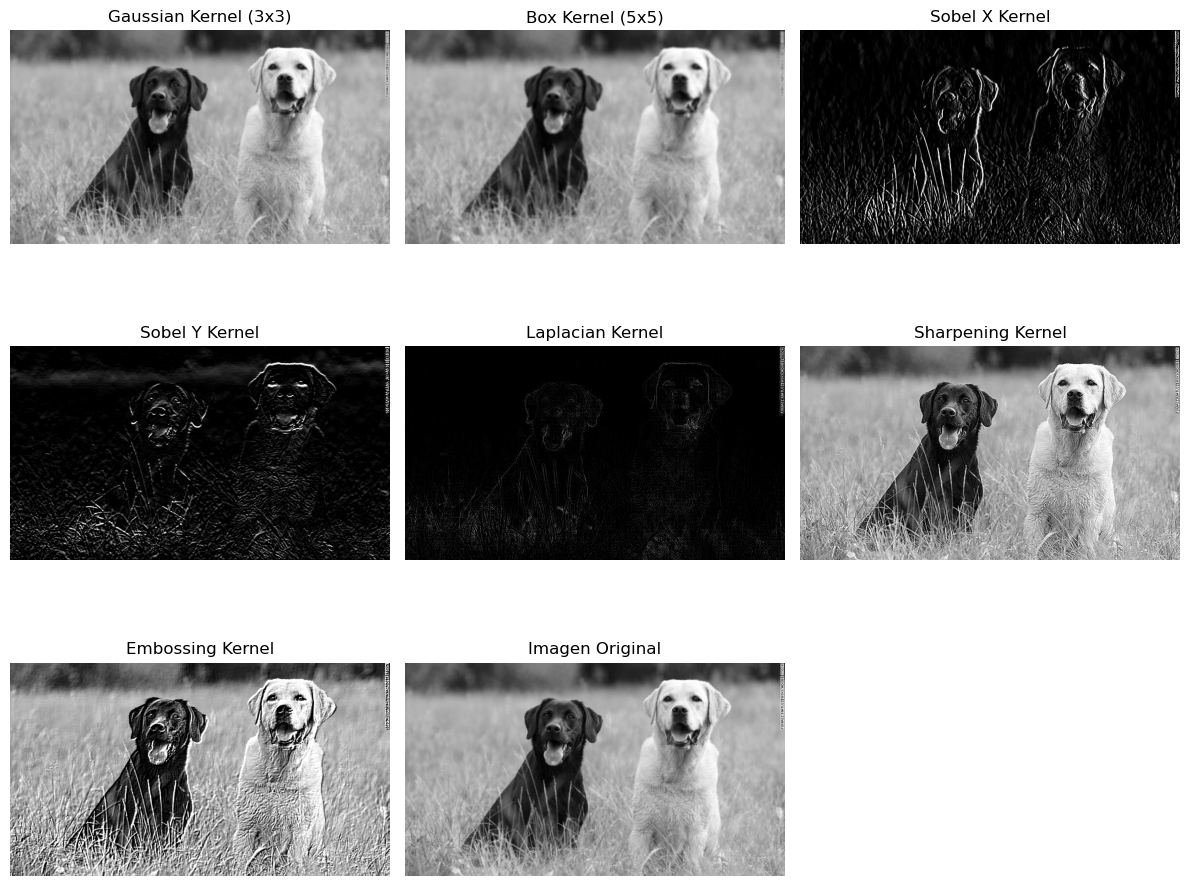

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen de ejemplo
image = cv2.imread('imagen1.jpg', cv2.IMREAD_GRAYSCALE)

# Definir los kernels
gaussian_kernel_3x3 = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16.0

box_kernel_5x5 = np.ones((5, 5), np.float32) / 25.0

sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

embossing_kernel = np.array([[-2, -1, 0],
                             [-1, 1, 1],
                             [0, 1, 2]])

# Aplicar los filtros de convolución
gaussian_result = cv2.filter2D(image, -1, gaussian_kernel_3x3)
box_result = cv2.filter2D(image, -1, box_kernel_5x5)
sobel_x_result = cv2.filter2D(image, -1, sobel_kernel_x)
sobel_y_result = cv2.filter2D(image, -1, sobel_kernel_y)
laplacian_result = cv2.filter2D(image, -1, laplacian_kernel)
sharpening_result = cv2.filter2D(image, -1, sharpening_kernel)
embossing_result = cv2.filter2D(image, -1, embossing_kernel)

# Mostrar los resultados
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(gaussian_result, cmap='gray')
plt.title('Gaussian Kernel (3x3)')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(box_result, cmap='gray')
plt.title('Box Kernel (5x5)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(sobel_x_result, cmap='gray')
plt.title('Sobel X Kernel')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(sobel_y_result, cmap='gray')
plt.title('Sobel Y Kernel')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian Kernel')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(sharpening_result, cmap='gray')
plt.title('Sharpening Kernel')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(embossing_result, cmap='gray')
plt.title('Embossing Kernel')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.tight_layout()
plt.show()

